### Regex HW

In [ ]:
import re
import matplotlib.pyplot as plt

In [ ]:
#download the input file
!wget https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references

--2022-11-18 03:20:17--  https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1206044 (1.1M) [text/plain]
Saving to: ‘references.1’

references.1        100%[===================>]   1.15M  --.-KB/s    in 0.05s   

2022-11-18 03:20:17 (22.4 MB/s) - ‘references.1’ saved [1206044/1206044]



Task 1

In [ ]:
with open('/content/references') as inp_file, open('ftps', "w") as file_with_ftps:
    pattern = r"ftp\.[\w./#]*"  #matches links either with or without file extentions
    for line in inp_file:
        for link in re.findall(pattern, line):
            print(link.strip().replace(';', ''), file=file_with_ftps, sep = '\n') # write the output into a file


Task 2

In [ ]:
!wget https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD

--2022-11-18 03:20:17--  https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16759 (16K) [text/plain]
Saving to: ‘2430AD.1’

2430AD.1            100%[===================>]  16.37K  --.-KB/s    in 0.001s  

2022-11-18 03:20:17 (18.4 MB/s) - ‘2430AD.1’ saved [16759/16759]



In [ ]:
with open("/content/2430AD") as inp_file, open('numbers', "w") as file_with_nums:
    pattern_num = r"((\d+(\.\d+)?)|(\.\d+))" # a pattern that matches all numbers
    for line in inp_file:
        match = re.findall(pattern_num, line)
        for num in match:
            print(num[0], file=file_with_nums, sep = '\n')  # write the output into a file




Task 3

In [ ]:
with open("/content/2430AD") as inp_file, open('a_words', "w") as file_a:
    pattern_a = r"\w*[a]\w*" # a pattern for words with letter "a"
    for line in inp_file:
        match = re.findall(pattern_a, line, re.IGNORECASE)
        for word in match:
            print(word, file=file_a, sep = '\n') # write the output into a file


Task 4

In [ ]:
with open("/content/2430AD") as inp_file, open('exclamations', "w") as file_excl:
    pattern_excl = r"([A-Z][^\.!?]*!)" # a pattern for exclamations
    for line in inp_file:
        match = re.findall(pattern_excl, line)
        for sentence in match:
            print(sentence, file=file_excl, sep = '\n') # write the output into a file

Task 5

5. Постройте гистограмму распределения длин уникальных слов (без учёта регистра, длина от 1) в тексте.   (5 баллов)

In [ ]:
pattern_words = r"[a-zA-Z\'\-]+"  #not including numbers; a word may contain "-" and "'" symbols
with open("/content/2430AD") as inp_file:
    story = inp_file.read()       #read the whole file

word_list = re.findall(pattern_words, story)
unique_words = set([x.lower() for x in word_list])
# number of unique words
len_all = len(unique_words)
# make a dictionary word length : words
dict_words = {}          
for item in unique_words:
    dict_words.setdefault(len(item), []).append(item)
# make a dictionary word length : frequency
dict_freqs = {}
for key in sorted(dict_words.keys()):
    dict_freqs[key] = len(dict_words[key])/len_all
dict_freqs

{1: 0.004206098843322818,
 2: 0.026288117770767613,
 3: 0.07676130389064142,
 4: 0.16929547844374343,
 5: 0.15667718191377497,
 6: 0.15141955835962145,
 7: 0.1398527865404837,
 8: 0.10725552050473186,
 9: 0.07045215562565721,
 10: 0.03995793901156677,
 11: 0.029442691903259727,
 12: 0.011566771819137749,
 13: 0.0031545741324921135,
 14: 0.004206098843322818,
 15: 0.002103049421661409,
 16: 0.0010515247108307045,
 17: 0.002103049421661409,
 18: 0.0010515247108307045,
 19: 0.002103049421661409,
 20: 0.0010515247108307045}

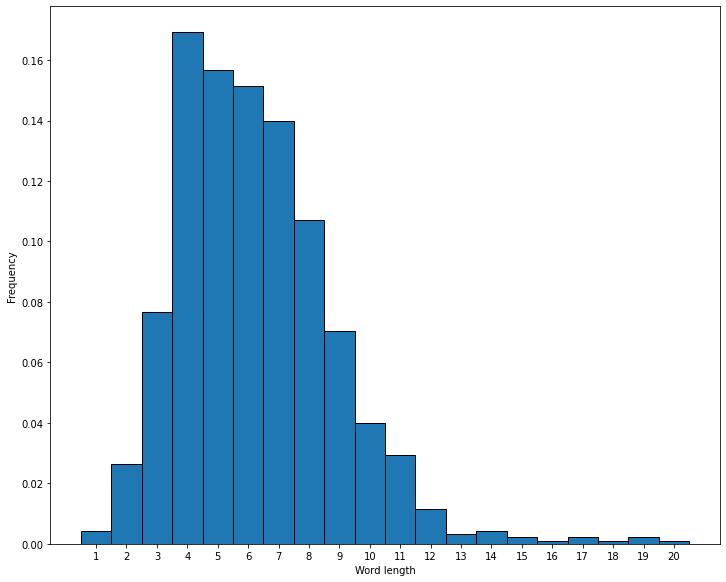

In [ ]:
# plot 
plt.figure(figsize=(10,8));
plt.bar(dict_freqs.keys(), dict_freqs.values(), width = 1, edgecolor = "black");
plt.tight_layout();
plt.xticks(list(i for i in range(1, len(dict_freqs)+1)));
plt.xlabel("Word length");
plt.ylabel("Frequency");
plt.show;

Task 6

In [ ]:
def brick_translator(text):
    translated = re.sub(r'([ауоыиэяюёеАУОЫИЭЯЮЁЕ])', r'\1к\1', text)
    return translated

brick_translator("Синхрофазатрон")

'Сикинхрокофаказакатрокон'

Task 7

In [ ]:
def find_sent(text):
    sentences = []
    sentence_pattern = r"([A-ZА-Я][^\.!?]*)"
    sentences.extend(re.findall(sentence_pattern, text))
    return sentences
def find_n_words_sentences(text, n):
    sentences = find_sent(text=text)
    matched_sent = []
    for sentence in sentences:
        words = (re.findall(r"[a-zA-ZА-Яа-я\'\-]+", sentence))
        if len(words) == n:
            matched_sent.append(tuple(words))
    return matched_sent

In [ ]:
find_n_words_sentences("Здесь три слова. Здесь тоже три", 3)    

[('Здесь', 'три', 'слова'), ('Здесь', 'тоже', 'три')]